<a href="https://colab.research.google.com/github/utkarshsharma1/ECG_Signals/blob/master/1D_dataset_Augmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass

!pip install pyyaml h5py  # Required to save models in HDF5 format

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
%matplotlib inline

import pandas as pd
import numpy as np
import os
from sklearn.utils import shuffle
import matplotlib.pyplot as plt
import h5py
import math
from glob import glob
from scipy.signal import resample
import random
np.random.seed(42)
import seaborn as sns

#Load Data

In [ ]:
alldata = np.empty(shape=[0, 188])

paths = glob('/content/drive/My Drive/Colab Notebooks/data_ecg/*.csv')
for path in paths:
    try:
      #It only takes files of our dataset and ignores rest
      if(path.split('/')[-1][0] == '1' or path.split('/')[-1][0] == '2'):
        print('Loading ', path)
        csvrows = np.loadtxt(path, delimiter=',')
        alldata = np.append(alldata, csvrows, axis=0)
    except:
      print("Error")

Loading  /content/drive/My Drive/Colab Notebooks/data_ecg/100_MLII.csv
Loading  /content/drive/My Drive/Colab Notebooks/data_ecg/100_V5.csv
Loading  /content/drive/My Drive/Colab Notebooks/data_ecg/101_MLII.csv
Loading  /content/drive/My Drive/Colab Notebooks/data_ecg/101_V1.csv
Loading  /content/drive/My Drive/Colab Notebooks/data_ecg/102_V5.csv
Loading  /content/drive/My Drive/Colab Notebooks/data_ecg/102_V2.csv
Loading  /content/drive/My Drive/Colab Notebooks/data_ecg/103_MLII.csv
Loading  /content/drive/My Drive/Colab Notebooks/data_ecg/103_V2.csv
Loading  /content/drive/My Drive/Colab Notebooks/data_ecg/104_V5.csv
Loading  /content/drive/My Drive/Colab Notebooks/data_ecg/104_V2.csv
Loading  /content/drive/My Drive/Colab Notebooks/data_ecg/105_MLII.csv
Loading  /content/drive/My Drive/Colab Notebooks/data_ecg/105_V1.csv
Loading  /content/drive/My Drive/Colab Notebooks/data_ecg/106_MLII.csv
Loading  /content/drive/My Drive/Colab Notebooks/data_ecg/106_V1.csv
Loading  /content/drive/

In [ ]:
print(alldata.shape)
print(np.unique(alldata[:,187], return_counts=True))

(146234, 188)
(array([0., 1., 2., 3., 4., 5.]), array([112447,   6566,   9585,   4783,   9722,   3131]))


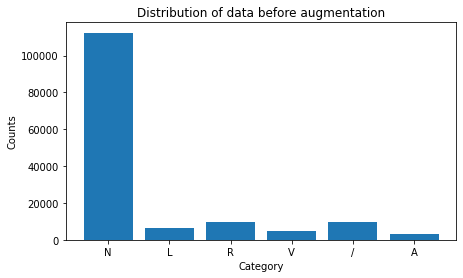

In [ ]:
a, b = np.unique(alldata[:,187], return_counts=True)
plt.figure(figsize= (7, 4))
plt.xlabel("Category")
plt.ylabel("Counts")  
plt.title("Distribution of data before augmentation")
A = ['N', 'L', 'R', 'V', '/', 'A']
plt.bar(a, b, tick_label = A )
plt.savefig("/content/drive/My Drive/Colab Notebooks/1D_output/data_distribution.jpg")

In [ ]:
df = pd.DataFrame.from_records(alldata)
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187
0,0.669411,0.579191,0.027081,0.159776,0.109931,0.165558,0.127484,0.147963,0.123659,0.152570,0.120649,0.147532,0.140926,0.141007,0.120620,0.136173,0.132908,0.138769,0.137194,0.137430,0.127765,0.127547,0.140362,0.134910,0.134581,0.125649,0.135959,0.127262,0.135332,0.125608,0.127909,0.126565,0.117908,0.111217,0.114543,0.115438,0.113080,0.116654,0.124365,0.142172,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.702475,0.782524,0.166335,0.101707,0.077532,0.144347,0.102707,0.136863,0.105399,0.120042,0.101827,0.129193,0.108682,0.114550,0.108623,0.111996,0.100243,0.110256,0.109961,0.113979,0.116104,0.112457,0.118203,0.114287,0.113681,0.111939,0.104452,0.107706,0.096508,0.098805,0.089470,0.089159,0.076505,0.081691,0.067399,0.077280,0.064582,0.089117,0.093312,0.136579,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.737790,0.796901,0.081758,0.161546,0.137585,0.171284,0.139616,0.166056,0.138925,0.155468,0.137550,0.147941,0.133740,0.151228,0.131918,0.151089,0.140657,0.161562,0.142910,0.159723,0.130961,0.150790,0.131368,0.156519,0.137413,0.158221,0.147507,0.163982,0.144516,0.152852,0.134378,0.148044,0.131215,0.141157,0.135128,0.146530,0.155095,0.185870,0.191658,0.202343,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.714591,0.560478,-0.029479,0.161665,0.078421,0.150414,0.088287,0.137978,0.094037,0.127950,0.096241,0.130713,0.110203,0.127033,0.106080,0.125370,0.118795,0.132817,0.118136,0.131843,0.122374,0.130198,0.126090,0.130587,0.124609,0.134738,0.128962,0.130545,0.131968,0.127552,0.130620,0.129524,0.135250,0.126851,0.129270,0.140603,0.159969,0.176002,0.180978,0.195622,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.699162,0.595851,-0.005985,0.117447,0.082660,0.112321,0.077772,0.112916,0.090391,0.118374,0.097390,0.112145,0.085137,0.110473,0.080582,0.108035,0.082760,0.103658,0.082642,0.112224,0.096094,0.106861,0.076531,0.110904,0.088676,0.111723,0.086370,0.107507,0.087201,0.090009,0.068408,0.074706,0.054057,0.081229,0.070261,0.078362,0.084897,0.103362,0.122871,0.138358,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
df[187].value_counts()

0.0    112447
4.0      9722
2.0      9585
1.0      6566
3.0      4783
5.0      3131
Name: 187, dtype: int64

In [ ]:
M = df.values
X = M[:, :-1]
y = M[:, -1].astype(int)

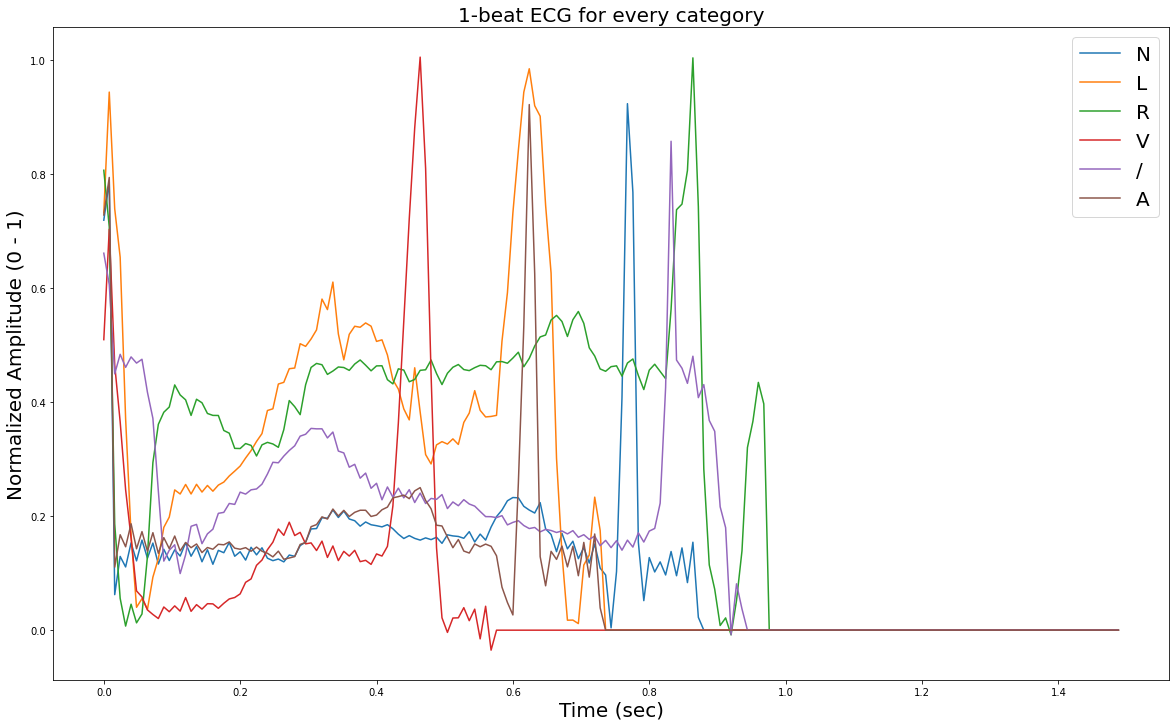

In [ ]:
C0 = np.argwhere(y == 0).flatten()
C1 = np.argwhere(y == 1).flatten()
C2 = np.argwhere(y == 2).flatten()
C3 = np.argwhere(y == 3).flatten()
C4 = np.argwhere(y == 4).flatten()
C5 = np.argwhere(y == 5).flatten()

x = np.arange(0, 187)*8/1000.0

plt.figure(figsize=(20,12))
plt.plot(x, X[C0, :][10], label="N") # Display first normal beat.
plt.plot(x, X[C1, :][10], label="L") # Display first abnormal beat.
plt.plot(x, X[C2, :][10], label="R") # Display first abnormal beat.
plt.plot(x, X[C3, :][10], label="V") # Display first abnormal beat.
plt.plot(x, X[C4, :][10], label="/") # Display first abnormal beat.
plt.plot(x, X[C5, :][10], label="A") 

plt.legend(fontsize=20)
plt.title("1-beat ECG for every category", fontsize=20)
plt.ylabel("Normalized Amplitude (0 - 1)", fontsize=20)
plt.xlabel("Time (sec)", fontsize = 20)
plt.savefig('/content/drive/My Drive/Colab Notebooks/data_ecg_v2/1-beat ECG for every category 3.jpg')

In [ ]:
def stretch(x):
    l = int(187 * (1 + (random.random()-0.5)/3))
    y = resample(x, l)
    if l < 187:
        y_ = np.zeros(shape=(187, ))
        y_[:l] = y
    else:
        y_ = y[:187]
    return y_

def amplify(x):
    alpha = (random.random()-0.5)
    factor = -alpha*x + (1+alpha)
    return x*factor
  
def augment(x):
    result = np.zeros(shape= (4, 187))
    for i in range(len(result)):
        tmp = random.random()
        if tmp < 0.33:
            new_y = stretch(x)
        elif tmp < 0.66:
            new_y = amplify(x)
        else:
            new_y = stretch(x)
            new_y = amplify(new_y)
        result[i, :] = new_y
    return result

In [ ]:
random.random()-0.5

-0.3091501563558138

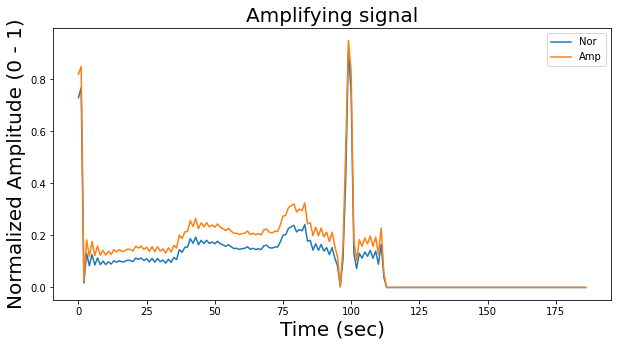

In [ ]:
plt.figure(figsize = (10, 5))
i = 10
plt.title("Amplifying signal", fontsize=20)
plt.ylabel("Normalized Amplitude (0 - 1)", fontsize=20)
plt.xlabel("Time (sec)", fontsize = 20)
plt.plot(X[i, :], label = 'Nor')
plt.plot(amplify( X[i, :]), label = 'Amp')
#plt.plot(stretch( X[i, :]), label = 'Str')
plt.legend()
plt.savefig('/content/drive/My Drive/Colab Notebooks/data_ecg_v2/unstretching.jpg')

In [ ]:
print(X.shape, y.shape)
np.unique(y, return_counts = True)

(146234, 187) (146234,)


(array([0, 1, 2, 3, 4, 5]),
 array([112447,   6566,   9585,   4783,   9722,   3131]))

In [ ]:
C1 = np.argwhere(y == 1).flatten()
result = np.apply_along_axis(augment, axis=1, arr=X[C1]).reshape(-1, 187)
classes = np.ones(shape=(result.shape[0],), dtype=int)*1
X = np.vstack([X, result])
y = np.hstack([y, classes])

In [ ]:
print(X.shape, y.shape)
np.unique(y, return_counts = True)

(172498, 187) (172498,)


(array([0, 1, 2, 3, 4, 5]),
 array([112447,  32830,   9585,   4783,   9722,   3131]))

In [ ]:
C2 = np.argwhere(y == 2).flatten()
result = np.apply_along_axis(augment, axis=1, arr=X[C2]).reshape(-1, 187)
classes = np.ones(shape=(result.shape[0],), dtype=int)*2
X = np.vstack([X, result])
y = np.hstack([y, classes])

print(X.shape, y.shape)
np.unique(y, return_counts = True)

(210838, 187) (210838,)


(array([0, 1, 2, 3, 4, 5]),
 array([112447,  32830,  47925,   4783,   9722,   3131]))

In [ ]:
C3 = np.argwhere(y == 3).flatten()
result = np.apply_along_axis(augment, axis=1, arr=X[C3]).reshape(-1, 187)
classes = np.ones(shape=(result.shape[0],), dtype=int)*3
X = np.vstack([X, result])
y = np.hstack([y, classes])

print(X.shape, y.shape)
np.unique(y, return_counts = True)

(229970, 187) (229970,)


(array([0, 1, 2, 3, 4, 5]),
 array([112447,  32830,  47925,  23915,   9722,   3131]))

In [ ]:
C4 = np.argwhere(y == 4).flatten()
result = np.apply_along_axis(augment, axis=1, arr=X[C4]).reshape(-1, 187)
classes = np.ones(shape=(result.shape[0],), dtype=int)*4
X = np.vstack([X, result])
y = np.hstack([y, classes])

print(X.shape, y.shape)
np.unique(y, return_counts = True)

(268858, 187) (268858,)


(array([0, 1, 2, 3, 4, 5]),
 array([112447,  32830,  47925,  23915,  48610,   3131]))

In [ ]:
C4 = np.argwhere(y == 5).flatten()
result = np.apply_along_axis(augment, axis=1, arr=X[C5]).reshape(-1, 187)
classes = np.ones(shape=(result.shape[0],), dtype=int)*5
X = np.vstack([X, result])
y = np.hstack([y, classes])

print(X.shape, y.shape)
np.unique(y, return_counts = True)

(281382, 187) (281382,)


(array([0, 1, 2, 3, 4, 5]),
 array([112447,  32830,  47925,  23915,  48610,  15655]))

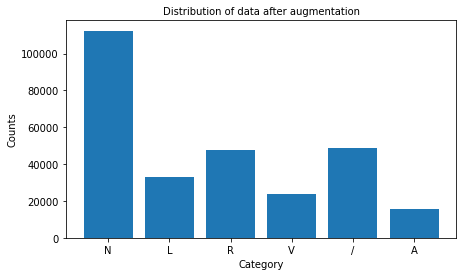

In [ ]:
a, b = np.unique(y, return_counts = True)
plt.figure(figsize= (7, 4))
plt.xlabel("Category", fontsize = 10)
plt.ylabel("Counts", fontsize = 10)  
plt.title("Distribution of data after augmentation", fontsize = 10)
A = ['N', 'L', 'R', 'V', '/', 'A']
plt.bar(a, b, tick_label = A )
plt.savefig("/content/drive/My Drive/Colab Notebooks/data_ecg_v2/aug_data_distribution.jpg")

#Splitting

In [ ]:
C0 = np.argwhere(y == 0).flatten()
C1 = np.argwhere(y == 1).flatten()
C2 = np.argwhere(y == 2).flatten()
C3 = np.argwhere(y == 3).flatten()
C4 = np.argwhere(y == 4).flatten()
C5 = np.argwhere(y == 5).flatten()

In [ ]:
subC0 = np.random.choice(C0, 8000)
subC1 = np.random.choice(C1, 8000)
subC2 = np.random.choice(C2, 8000)
subC3 = np.random.choice(C3, 8000)
subC4 = np.random.choice(C4, 8000)
subC5 = np.random.choice(C5, 8000)

In [ ]:
X_test = np.vstack([X[subC0], X[subC1], X[subC2], X[subC3], X[subC4], X[subC5]])
y_test = np.hstack([y[subC0], y[subC1], y[subC2], y[subC3], y[subC4], y[subC5]])

In [ ]:
print(X_test.shape, y_test.shape)

(48000, 187) (48000,)


In [ ]:
X_train = np.delete(X, [subC0, subC1, subC2, subC3, subC4], axis=0)
y_train = np.delete(y, [subC0, subC1, subC2, subC3, subC4], axis=0)

In [ ]:
X_train, y_train = shuffle(X_train, y_train, random_state=0)
X_test, y_test = shuffle(X_test, y_test, random_state=0)

In [ ]:
train_aug_data = np.concatenate((X_train, y_train.reshape(len(y_train), 1)), axis = 1)
test_aug_data = np.concatenate((X_test, y_test.reshape(len(y_test), 1)), axis =1)
print(train_aug_data.shape, test_aug_data.shape)

(245009, 188) (48000, 188)


In [ ]:
with open('/content/drive/My Drive/Colab Notebooks/data_ecg/train_aug_v3.csv', "wb") as fin:
    np.savetxt(fin, train_aug_data, delimiter=",", fmt='%f')

with open('/content/drive/My Drive/Colab Notebooks/data_ecg/test_aug_v3.csv', "wb") as fin:
    np.savetxt(fin, test_aug_data, delimiter=",", fmt='%f')